In [1]:
pip install  gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 54.1 MB/s eta 0:00:00


In [2]:
import pandas as pd #importing all libraries that required
import nltk
import spacy
nlp=spacy.load("en_core_web_sm")
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import re
from scipy.sparse import hstack
import warnings
warnings.filterwarnings("ignore")

In [116]:
df=pd.read_csv("/content/amazonreviews.tsv",sep="\t") #reading amazon datasets

In [117]:
df

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [118]:
df["review"]

,review
0,Stuning even for the non-gamer: This sound tra...
1,The best soundtrack ever to anything.: I'm rea...
2,Amazing!: This soundtrack is my favorite music...
3,Excellent Soundtrack: I truly like this soundt...
4,"Remember, Pull Your Jaw Off The Floor After He..."
...,...
9995,A revelation of life in small town America in ...
9996,Great biography of a very interesting journali...
9997,Interesting Subject; Poor Presentation: You'd ...
9998,Don't buy: The box looked used and it is obvio...


In [119]:
df["label"]

,label
0,pos
1,pos
2,pos
3,pos
4,pos
...,...
9995,pos
9996,pos
9997,neg
9998,neg


In [120]:
df.isnull().sum() #checking for null values

,0
label,0
review,0


In [121]:
df.duplicated().sum() #che4cking for duplicates

np.int64(0)

In [196]:
df["label"].value_counts() #checking positive and negative counts

,count
label,
neg,5097
pos,4903


In [123]:
df.describe() #describing the data

,label,review
count,10000,10000
unique,2,10000
top,neg,Early Hopkins story still sends chills through...
freq,5097,1


Data Cleanings

In [8]:
def data_cleanings(texts):
  texts=" ".join(re.findall(r"\w+",texts))
  doc=nlp(texts)
  cleaned_datas=[tokens.lemma_.lower() for tokens in doc
                 if not tokens.is_stop
                 and not tokens.is_punct
                 and not tokens.is_bracket
                 and not tokens.is_digit
                 and not tokens.is_currency]
  return cleaned_datas

Apllying  the data cleaning to convert textual data into the tokens

In [126]:
df["tokens"]=df["review"].apply(data_cleanings)

In [127]:
df["tokens"]

,tokens
0,"[stun, non, gamer, sound, track, beautiful, pa..."
1,"[good, soundtrack, m, read, lot, review, say, ..."
2,"[amazing, soundtrack, favorite, music, time, h..."
3,"[excellent, soundtrack, truly, like, soundtrac..."
4,"[remember, pull, jaw, floor, hear, ve, play, g..."
...,...
9995,"[revelation, life, small, town, america, early..."
9996,"[great, biography, interesting, journalist, bi..."
9997,"[interesting, subject, poor, presentation, d, ..."
9998,"[don, t, buy, box, look, obviously, new, try, ..."


joining the tokens to form sentance to identify the sentiments

In [128]:
df["tokenss"]=[" ".join(tokens) for tokens in df["tokens"]]

In [129]:
df["tokenss"]

,tokenss
0,stun non gamer sound track beautiful paint sen...
1,good soundtrack m read lot review say good gam...
2,amazing soundtrack favorite music time hand in...
3,excellent soundtrack truly like soundtrack enj...
4,remember pull jaw floor hear ve play game know...
...,...
9995,revelation life small town america early 1900 ...
9996,great biography interesting journalist biograp...
9997,interesting subject poor presentation d hard p...
9998,don t buy box look obviously new try contact e...


 identifieng positive texts

In [132]:
positive_tests=" ".join(df[df["label"] == "pos"]["tokenss"])

identifieng negative texts

In [150]:
negative_texts=" ".join(df[df["label"]=="neg"]["tokenss"])

In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud vissualizarions of negative texts

Text(0.5, 1.0, 'total negative texts of the amazon e-commerce datasets')

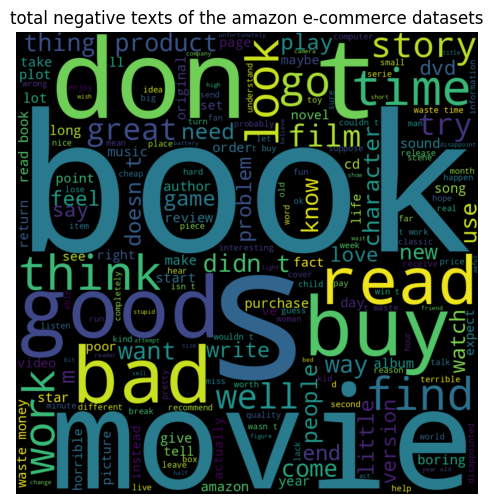

In [159]:
plt.figure(figsize=(10,6))
neg_wordclouds=WordCloud(width=1000,height=1000,background_color="black").generate(negative_texts)
plt.imshow(neg_wordclouds,interpolation="bilinear")
plt.axis("off")
plt.title("total negative texts of the amazon e-commerce datasets")

wordcloud vissualization of positive texts

Text(0.5, 1.0, 'total positive texts present in amazon e-commerce datasets')

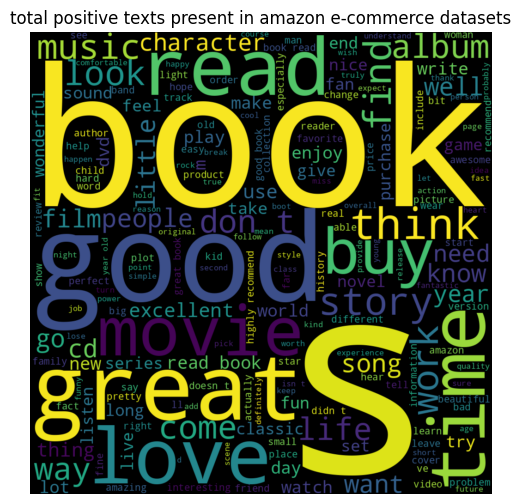

In [162]:
plt.figure(figsize=(10,6))
pos_wordclouds=WordCloud(width=1000,height=1000,background_color="black").generate(positive_texts)
plt.imshow(pos_wordclouds,interpolation="bilinear")
plt.axis("off")
plt.title("total positive texts present in amazon e-commerce datasets")

In [165]:
from collections import Counter

most common negative texts

In [166]:
neg_counts=Counter(negative_texts.split()).most_common(20)

most common positive texts

In [172]:
pos_counts=Counter(positive_texts.split()).most_common(20)

In [173]:
neg_counts

[('book', 3755),
 ('t', 3596),
 ('s', 2916),
 ('movie', 1777),
 ('like', 1697),
 ('read', 1624),
 ('buy', 1530),
 ('good', 1423),
 ('time', 1314),
 ('bad', 1265),
 ('don', 1135),
 ('work', 1014),
 ('think', 966),
 ('get', 826),
 ('find', 823),
 ('look', 777),
 ('story', 768),
 ('money', 767),
 ('product', 705),
 ('go', 699)]

In [174]:
pos_counts

[('book', 3918),
 ('s', 3149),
 ('good', 2355),
 ('great', 2226),
 ('read', 2002),
 ('t', 1869),
 ('like', 1512),
 ('movie', 1323),
 ('love', 1314),
 ('time', 1181),
 ('story', 868),
 ('buy', 856),
 ('work', 840),
 ('think', 810),
 ('find', 794),
 ('year', 693),
 ('get', 651),
 ('cd', 644),
 ('look', 612),
 ('recommend', 592)]

In [14]:
word2_vecs=Word2Vec(sentences=df["tokens"], # defining word2vectoeization
                    vector_size=300,
                    min_count=3,
                    workers=4,
                    epochs=30,
                    window=8,
                    sg=1
                    )

In [15]:
def word_vectors(tokens,models): # identifieng the vectors
  vectors=[models.wv[words] for words in tokens if words in models.wv]
  if len(vectors)>0:
    return np.mean(vectors,axis=0)
  else:
    return np.zeros(models.vector_size)

In [16]:
x=df["tokens"]

In [17]:
y=df["label"]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y) #reain test split the data

In [19]:
x_train.shape

(8000,)

In [22]:
x_test.shape

(2000,)

In [23]:
y_train.shape

(8000,)

In [24]:
y_test.shape

(2000,)

In [26]:
import numpy as np

In [28]:
x_train_words= np.vstack([word_vectors(tokenss,word2_vecs)for tokenss in x_train]) #word2vectorizations for training and restimg the data and to understand the contexts of data

In [29]:
x_test_words=np.vstack([word_vectors(tokenss,word2_vecs) for tokenss in x_test])

In [30]:
word_models=LogisticRegression() #fitting logistic regression for word2vectorizations

In [31]:
word_models.fit(x_train_words,y_train)

LogisticRegression()

In [33]:
y_preds=word_models.predict(x_test_words)

In [34]:
accuracy_score(y_test,y_preds)

0.831

In [36]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         neg       0.83      0.84      0.84      1019
         pos       0.83      0.82      0.83       981

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [77]:
svm=SVC() #fitting svm for word2vectorizations

In [78]:
svm.fit(x_train_words,y_train)

SVC()

In [79]:
y_preds=svm.predict(x_test_words)

In [80]:
accuracy_score(y_test,y_preds)

0.8375

In [82]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84      1019
         pos       0.84      0.83      0.83       981

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [38]:
tfidfs=TfidfVectorizer(ngram_range=(1,1),max_features=1000) #tfidf for identifieng the number of times terms appears in the documents

In [39]:
x_trains=[" ".join(tokens) for tokens in x_train]

In [40]:
x_tests=[" ".join(tokens) for tokens in x_test]

In [41]:
x_train_tfidfs=tfidfs.fit_transform(x_trains)

In [42]:
x_test_tfidfs=tfidfs.transform(x_tests)

In [43]:
tfidfs_models=LogisticRegression() #fitting logistic regression for tfidf

In [47]:
tfidfs_models.fit(x_train_tfidfs,y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_predss=tfidfs_models.predict(x_test_tfidfs)

In [50]:
accuracy_score(y_test,y_predss)

0.8335

In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         neg       0.83      0.84      0.84      1019
         pos       0.83      0.82      0.83       981

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [83]:
svm=SVC() #fitting svm  for word2vectorizations

In [85]:
 svm.fit(x_train_tfidfs,y_train)

SVC()

In [86]:
y_preds=svm.predict(x_test_tfidfs)

In [87]:
accuracy_score(y_test,y_preds)

0.8365

In [89]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         neg       0.83      0.85      0.84      1019
         pos       0.84      0.82      0.83       981

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [200]:
from scipy.sparse import hstack #hstack is to combine training and testing datas of both tfidf and word2vectors

In [57]:
x_train_combined=hstack([x_train_words,x_train_tfidfs])

In [58]:
x_test_combined=hstack([x_test_words,x_test_tfidfs])

In [64]:
combined_models=LogisticRegression()

In [65]:
combined_models.fit(x_train_combined,y_train)

LogisticRegression()

In [71]:
y_predictions=combined_models.predict(x_test_combined)

In [74]:
accuracy_score(y_test,y_predictions)

0.8435

In [76]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

         neg       0.85      0.85      0.85      1019
         pos       0.84      0.84      0.84       981

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [91]:
svm=SVC()

In [92]:
svm.fit(x_train_combined,y_train)

SVC()

In [112]:
y_preds=svm.predict(x_test_combined)

In [113]:
accuracy_score(y_test,y_preds)

0.8475

In [114]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         neg       0.85      0.85      0.85      1019
         pos       0.84      0.85      0.84       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [185]:
from sklearn.model_selection import cross_val_score, KFold #cross validations

In [186]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [187]:
cv_scores = cross_val_score(combined_models, x_train_combined, y_train, cv=kfold, scoring='accuracy')

In [188]:
print("Average Accuracy:", cv_scores.mean()) #accuracy for logisticregression after crossvalidations

Average Accuracy: 0.8544999999999998


In [191]:
cv_scores = cross_val_score(svm, x_train_combined, y_train, cv=kfold, scoring='accuracy')

In [194]:
cv_scores

array([0.87625 , 0.848125, 0.86625 , 0.8725  , 0.8525  ])

In [195]:
print("Average Accuracy:", cv_scores.mean()) #accuracy after crossvalidations for svm algorithms

Average Accuracy: 0.8631250000000001
